In [2]:
import numpy as np
import os
import shutil
import cv2
from matplotlib import pyplot as plt
import uuid
%matplotlib inline
from IPython.core.debugger import Tracer

from reader import Box, box_iou
from train import get_pred_func
from predict import predict_image

In [3]:
classes_name =  ["good", "null", "bar"]
classes_num = {'good': 0, 'null': 1, 'bar': 2}
use_classes_name = ["good", "null"]

In [4]:
predict_func = get_pred_func("train_log/train/model-1665016", "cmdt_params.json")

[0429 08:45:32 @common.py:94] conv1_1 input: [None, 3, None, None]
[0429 08:45:32 @common.py:102] conv1_1 output: [None, 32, None, None]
[0429 08:45:32 @common.py:94] pool1 input: [None, 32, None, None]
[0429 08:45:32 @common.py:102] pool1 output: [None, 32, None, None]
[0429 08:45:32 @common.py:94] conv2_1 input: [None, 32, None, None]
[0429 08:45:32 @common.py:102] conv2_1 output: [None, 64, None, None]
[0429 08:45:32 @common.py:94] pool2 input: [None, 64, None, None]
[0429 08:45:32 @common.py:102] pool2 output: [None, 64, None, None]
[0429 08:45:32 @common.py:94] conv3_1 input: [None, 64, None, None]
[0429 08:45:32 @common.py:102] conv3_1 output: [None, 128, None, None]
[0429 08:45:32 @common.py:94] conv3_2 input: [None, 128, None, None]
[0429 08:45:32 @common.py:102] conv3_2 output: [None, 64, None, None]
[0429 08:45:32 @common.py:94] conv3_3 input: [None, 64, None, None]
[0429 08:45:32 @common.py:102] conv3_3 output: [None, 128, None, None]
[0429 08:45:32 @common.py:94] pool3 inpu

In [11]:
anchors = [[2.09231069, 3.02696626], [2.89855228, 5.9450238], [4.52319573, 3.7978877], [5.94195853, 6.69752296], [9.05268409, 9.67410767]]
image_path = "cmdt_images/img3_170428_094554.jpg"
pred_results, image_result = predict_image(image_path, predict_func, anchors, use_classes_name, det_th=0.10, nms=True)

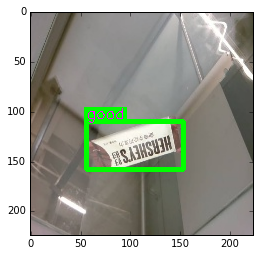

In [12]:
plt.imshow(image_result)

In [27]:
with open("cmdt_val.txt") as f:
    content = f.readlines()

cmdt_eval_dir = "cmdt_pred"

for line in content:
    eles = line.split(' ')
    image_path = eles[0]
    anchors = [[2.09231069, 3.02696626], [2.89855228, 5.9450238], [4.52319573, 3.7978877], [5.94195853, 6.69752296], [9.05268409, 9.67410767]]
    pred_results, image_result = predict_image(image_path, predict_func, anchors, use_classes_name, det_th=0.10, nms=True)
    image_save = cv2.cvtColor(image_result, cv2.COLOR_BGR2RGB)
    cv2.imwrite(os.path.join("cmdt_pred", str(uuid.uuid4()) + ".png"), image_save)

In [28]:
# plt.imshow(image_result)

In [ ]:
for image_idx, line in enumerate(content):
    
    if image_idx % 100 == 0 and image_idx > 0:
        print(str(image_idx))
    
    record = line.split(' ')
    image_path = record[0]
    image_id = os.path.basename(image_path).split('.')[0]

    pred_results, image_result = predict_image(image_path, predict_func, anchors, classes_name, det_th=0.25, nms=False)

    for class_name in pred_results.keys():
        with open(os.path.join(pred_dir, class_name), 'a') as f:
            for box in pred_results[class_name]:
                record = [image_id]
                record.extend(box)
                record = [str(ele) for ele in record]
                f.write(' '.join(record) + '\n')